# Submitted by:

Name   : Mirza Kaazima Ifrah

Reg No : BL.EN.U4CSE18073 

# Computer Purchase Classification

### Import Necessary packages

In [ ]:
import pandas as pd

In [ ]:
computer_df = pd.read_csv('https://raw.githubusercontent.com/Nuthi-Sriram/Bank_Loan_Modelling/master/DT_dataset.csv')
computer_df.head()

,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31...40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes


# Bank Personal Loan Classification

Universal bank is a small but growing bank. The majority of customers are liability, or deposit only customers, and the bank is interested in converting more of them into asset, or borrowing, customers. The bank has had past success with marketing campaigns to convert the liability customers to personal loan customers. With that success, the bank is interested in being more targeted with its efforts to ensure marketing dollars are spent on those most likely to convert. The bank would like a model to help it predict which new customers are likely to become personal loan customers to aid in this targeting.

## Business Question

Can we predict which new customers are most likely to say yes to a personal loan?

## Import Necessary packages

In [ ]:
import pandas as pd
from time import time
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


## Dataset Analysis

In [ ]:
bank_df = pd.read_csv('https://raw.githubusercontent.com/Nuthi-Sriram/Bank_Loan_Modelling/master/UniversalBank.csv')
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
# Drop columns that are not significant
bank_df = bank_df.drop(['ID', 'ZIP Code'], axis=1)
bank_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [ ]:
print('Shape:', bank_df.shape)

Shape: (5000, 12)


In [ ]:
bank_df['Personal Loan'].value_counts().rename_axis('Personal Loan').to_frame('No of customers')

,No of customers
Personal Loan,
0,4520
1,480


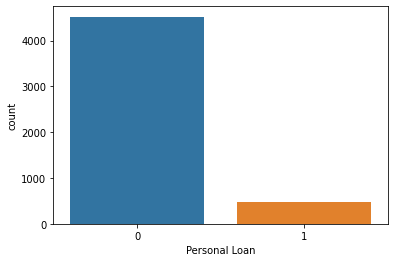

In [ ]:
sns.countplot(bank_df['Personal Loan'])



*   90.4% of the total customers do not take personal loan
*   9.6% of the total customers take personal loan
*   So, the dataset is skewed and we need to deal with this imbalanced dataset



## Split dataset into train & test

In [ ]:
feature = bank_df.copy().drop('Personal Loan', axis=1)
target = bank_df['Personal Loan']

In [ ]:
# Split the data into trainx, testx, trainy, testy with test_size = 0.20 using sklearn
x_train, x_test, y_train, y_test = train_test_split(feature, target, stratify=target, random_state=5, test_size=0.20)

In [ ]:
# Print the shape of x_train, x_test, y_train, y_test
print('Shape of x_train :', x_train.shape)
print('Shape of x_test  :', x_test.shape)
print('Shape of y_train :', y_train.shape)
print('Shape of y_test  :', y_test.shape)

Shape of x_train : (4000, 11)
Shape of x_test  : (1000, 11)
Shape of y_train : (4000,)
Shape of y_test  : (1000,)


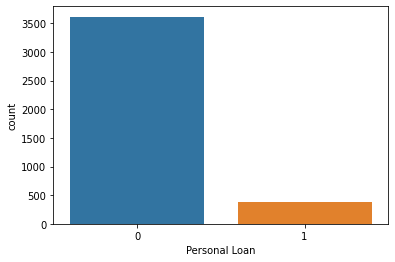

In [ ]:
sns.countplot(y_train)

## Preprocessing the dataset

In [ ]:
# Scale data to obtain zero mean and unit variance
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)  
x_test = scaler.transform(x_test)

In [ ]:
# Print the shape of x_train, x_test, y_train, y_test after oversampling
print('Shape of x_train :', x_train.shape)
print('Shape of x_test  :', x_test.shape)
print('Shape of y_train :', y_train.shape)
print('Shape of y_test  :', y_test.shape)

Shape of x_train : (4000, 11)
Shape of x_test  : (1000, 11)
Shape of y_train : (4000,)
Shape of y_test  : (1000,)


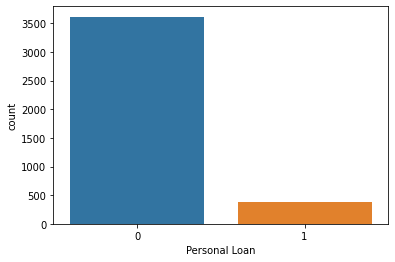

In [ ]:
sns.countplot(y_train)

## Decision Trees Classifier

In [ ]:
# Create decision tree object
dtree_classifier = DecisionTreeClassifier(random_state=42)

In [ ]:
t = time()
# Train the model
dtree_classifier.fit(x_train, y_train)
# Time is rounded to 3 decimal in seconds
print("Training time:", round(time()-t, 3), "s")

Training time: 0.009 s


In [ ]:
# Predict train data set
pred_train = dtree_classifier.predict(x_train)
# Predict test data set
pred_test = dtree_classifier.predict(x_test)

In [ ]:
# list the default parameters of the model
dtree_classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 42,
 'splitter': 'best'}

#### Performance of our model

In [ ]:
print("Accuracy on train is:", accuracy_score(y_train, pred_train))
print("Accuracy on test is:", accuracy_score(y_test, pred_test))

Accuracy on train is: 1.0
Accuracy on test is: 0.983


In [ ]:
# Checking performance of our model with classification report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       904
           1       0.94      0.88      0.91        96

    accuracy                           0.98      1000
   macro avg       0.97      0.93      0.95      1000
weighted avg       0.98      0.98      0.98      1000



In [ ]:
# Checking performance of our model with ROC Score
print('ROC Score:', roc_auc_score(y_test, pred_test))

ROC Score: 0.9347345132743362


## Hyper Parameter Tuning

In [ ]:
# List hyper parameters that we wish to tune
params = {'criterion': ['gini', 'entropy'], 'max_depth': range(1,10), 'min_samples_split': range(1,10), 'min_samples_leaf': range(1,5), 'random_state': [42]}
# Use grid search
grid = GridSearchCV(dtree_classifier, verbose=1, param_grid=params, cv=10, n_jobs=-1)

In [ ]:
# Train the model
grid.fit(x_train, y_train)
print()

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 5384 tasks      | elapsed:   23.3s


[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed:   28.2s finished


In [ ]:
print('Best Score:', grid.best_score_)
print('Best Parameters:', grid.best_params_)

Best Score: 0.9860000000000001
Best Parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42}


In [ ]:
best_dtree_classifier = grid.best_estimator_
# print best hyper parameters
print(best_dtree_classifier)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')


In [ ]:
t = time()
# Train the model
best_dtree_classifier.fit(x_train, y_train)
# Time is rounded to 3 decimal in seconds
print("Training time:", round(time()-t, 3), "s")

Training time: 0.008 s


In [ ]:
# Predict train data set
pred_train = best_dtree_classifier.predict(x_train)
# Predict test data set
pred_test = best_dtree_classifier.predict(x_test)

In [ ]:
print("Accuracy on train is:", accuracy_score(y_train, pred_train))
print("Accuracy on test is:", accuracy_score(y_test, pred_test))

Accuracy on train is: 0.99125
Accuracy on test is: 0.987


#### Confusion matrix for Train data

In [ ]:
# Print confusion matrix for train data
print(confusion_matrix(y_train, pred_train))

[[3604   12]
 [  23  361]]


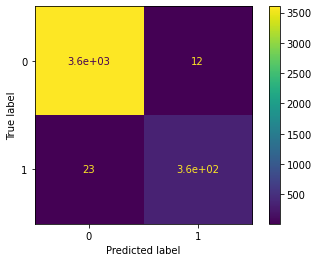

In [ ]:
# Plot confusion matrix for train data
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train, pred_train), display_labels=grid.classes_).plot()

#### Confusion matrix for Test data

In [ ]:
# Print confusion matrix for test data
print(confusion_matrix(y_test, pred_test))

[[901   3]
 [ 10  86]]


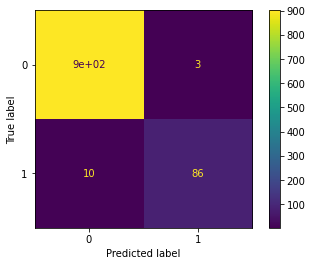

In [ ]:
# Plot confusion matrix for test data
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, pred_test), display_labels=grid.classes_).plot()

#### Performance of our model

In [ ]:
# Checking performance of our model with classification report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       904
           1       0.97      0.90      0.93        96

    accuracy                           0.99      1000
   macro avg       0.98      0.95      0.96      1000
weighted avg       0.99      0.99      0.99      1000



In [ ]:
# Checking performance of our model with ROC Score
print('ROC Score:', roc_auc_score(y_test, pred_test))

ROC Score: 0.9462573746312686


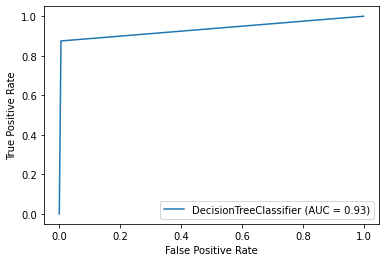

In [ ]:
# Plot ROC Curve
plot_roc_curve(dtree_classifier, x_test, y_test)